In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
import os

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

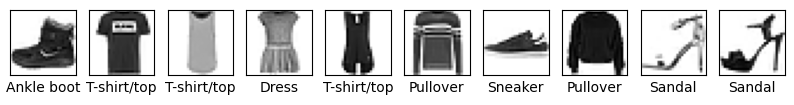

In [3]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
x_train = (x_train / 255.0).astype("float32")
x_test  = (x_test  / 255.0).astype("float32")

In [5]:
model = models.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
cb = [
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-6, verbose=1)
]

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=cb,
    verbose=1
)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6087 - loss: 1.1457 - val_accuracy: 0.8297 - val_loss: 0.4925 - learning_rate: 3.0000e-04
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8086 - loss: 0.5525 - val_accuracy: 0.8482 - val_loss: 0.4184 - learning_rate: 3.0000e-04
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8374 - loss: 0.4689 - val_accuracy: 0.8587 - val_loss: 0.3847 - learning_rate: 3.0000e-04
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8488 - loss: 0.4337 - val_accuracy: 0.8638 - val_loss: 0.3768 - learning_rate: 3.0000e-04
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8561 - loss: 0.4059 - val_accuracy: 0.8643 - val_loss: 0.3568 - learning_rate: 3.0000e-04
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8663 - loss: 0.3846 - val_accuracy: 0.8743 - val_loss: 0.3501 - learning_rate: 3.0000e-04
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accurac

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,176 (2.50 MB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 436,118 (1.66 MB)

In [9]:
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/model.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


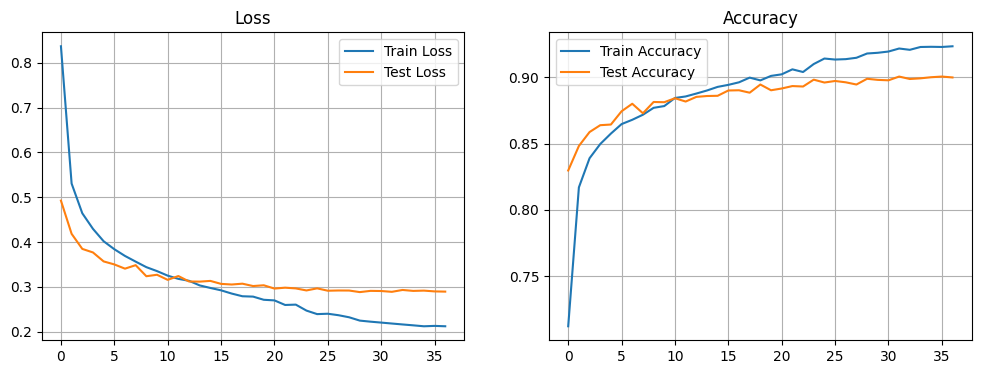

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
predictions = model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels, target_names=class_names))

313/313 - 1s - 3ms/step - accuracy: 0.8966 - loss: 0.3052
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.87      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.81      0.81      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.81      0.84      0.82      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.75      0.70      0.72      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



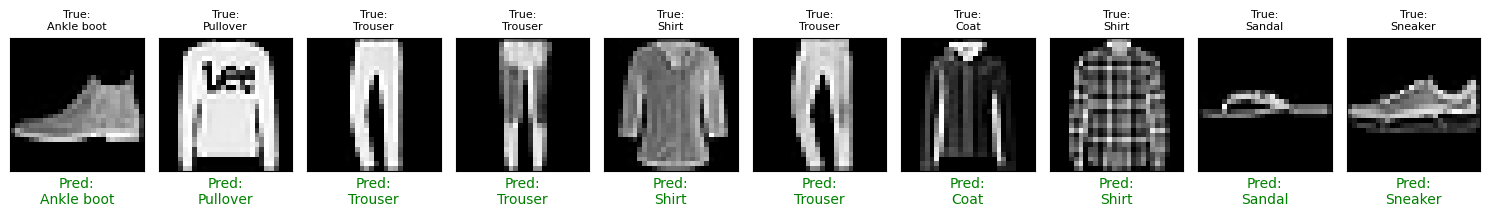

In [12]:
plt.figure(figsize=(15, 3))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap='gray')
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[y_test[i]]
    color = 'green' if predicted_labels[i] == y_test[i] else 'red'
    plt.xlabel(f"Pred:\n{pred_label}", color=color)
    plt.title(f"True:\n{true_label}", fontsize=8)

plt.tight_layout()
plt.show()

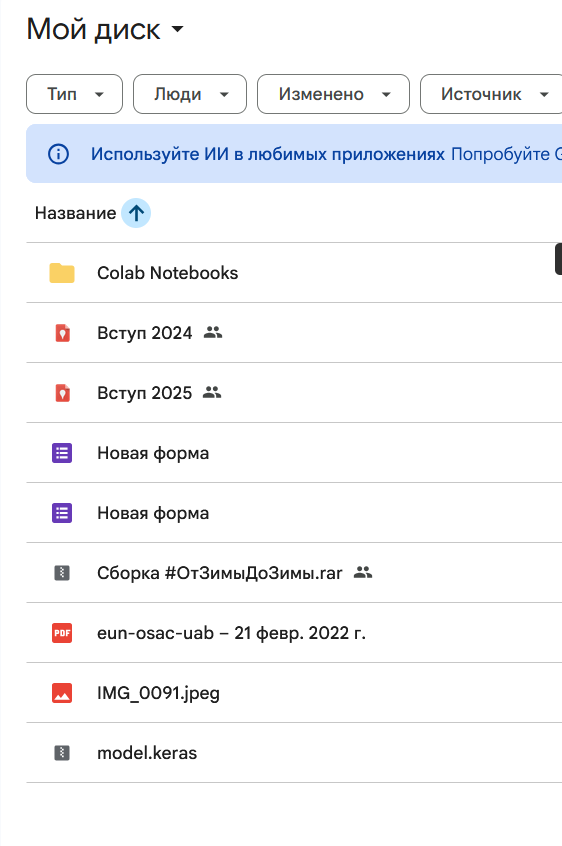